<a href="https://colab.research.google.com/github/rshaikh95/datasci_6_regression/blob/main/RegAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [3]:
from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

df = pd.concat((X, y), axis = 1)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


## Heart Disease dataset

Independent Variable: Age

Dependent Variable: trestbps (resting blood pressure (on admission to the hospital)	mm Hg





In [5]:
# Fit the regression model
X = sm.add_constant(df['age'])  # Adds a constant term to the predictor
model = sm.OLS(df['trestbps'], X)
results = model.fit()

In [6]:
# Print summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               trestbps   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     26.60
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           4.55e-07
Time:                        04:19:23   Log-Likelihood:                -1285.6
No. Observations:                 303   AIC:                             2575.
Df Residuals:                     301   BIC:                             2583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.4851      5.936     17.095      0.0

As per the Adjusted R square value, wwe can say that there is weak relationship between age and resting blood pressure.

The results also say that with every unit increase in age, the resting blood prssure increases by 0.55 units which is also significant at 5% significance level as per the p value.

In [7]:
residuals = results.resid
fitted = results.fittedvalues

In [8]:
##### CHECKING ASSUMPTIONS #####

### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")



Rainbow Test: stat=0.6902587963311865, p-value=0.9882552106847557


This shows that the relationship is linear.

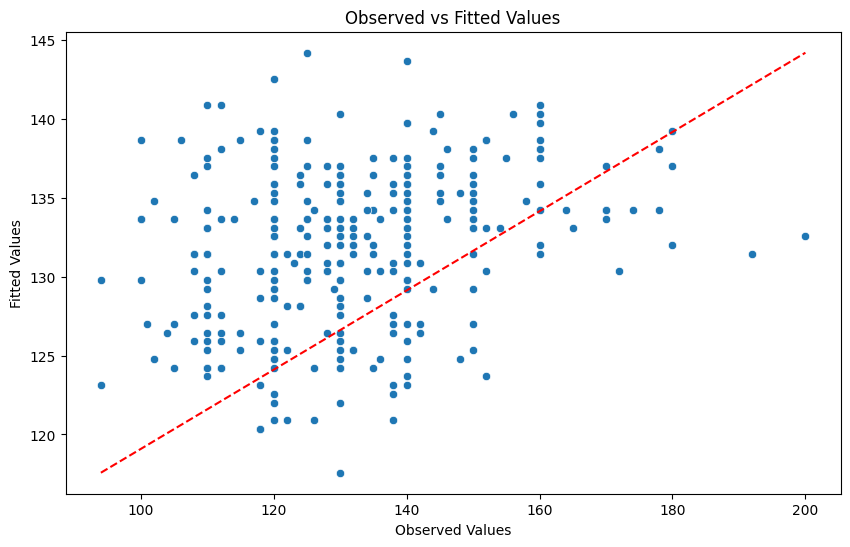

In [9]:
## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['trestbps'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['trestbps']), max(df['trestbps'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

Shapiro-Wilk Test: W=0.9803256988525391, p-value=0.00035427644615992904


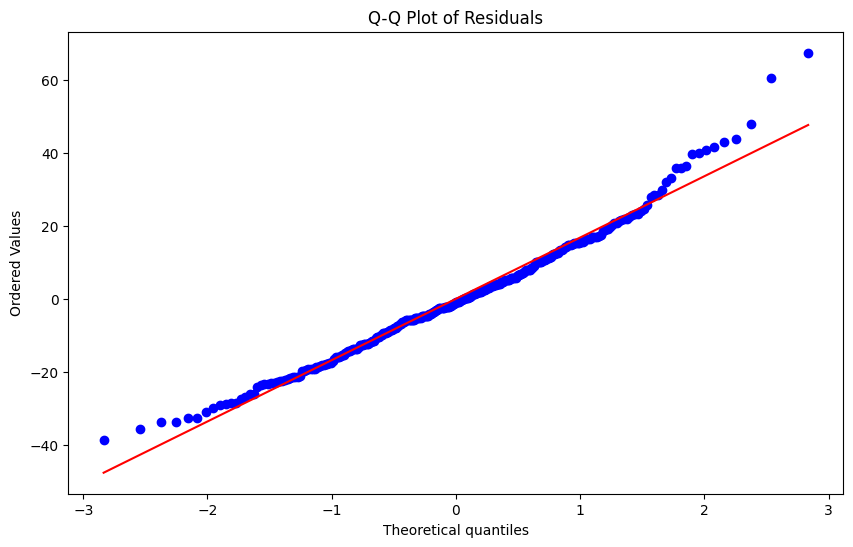

In [10]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


The p-value shows that there isn't a normal distribution between the variables.

In [11]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.2315487846211126, p-value=0.10198404692956961


The p-value indicates that the homgenity asssumtion has bbeen met.

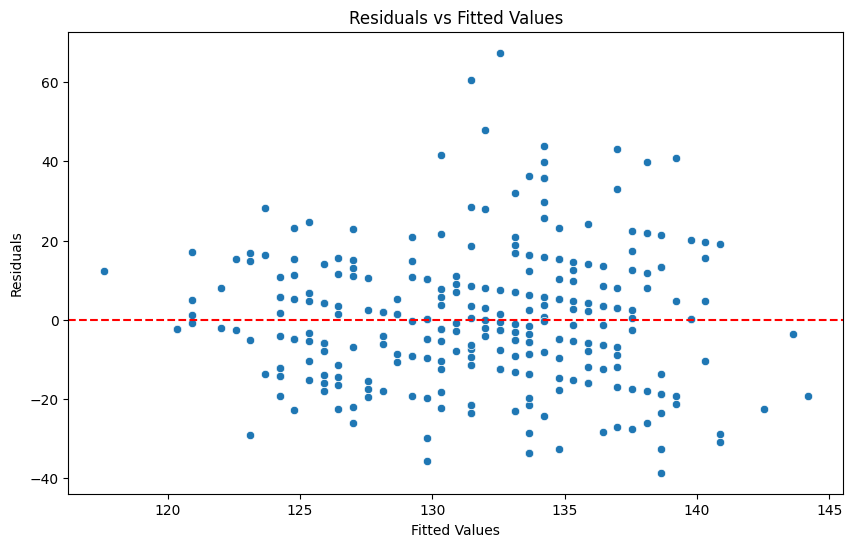

In [12]:

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()